In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import TreebankWordTokenizer
from pycocotools.coco import COCO
import os
import cPickle as pickle
sns.set(context='poster')
%matplotlib inline

In [2]:
COCO_BASE_PATH = 'E:/University Central/Bachelor Thesis/datasets/mscoco/'
TRAIN_ANNOTATIONS = 'captions_train2014.json'
VALID_ANNOTATIONS = 'captions_val2014.json'

In [4]:
cococaptions_train = COCO(annotation_file=os.path.join(COCO_BASE_PATH, 'annotations', TRAIN_ANNOTATIONS))
cococaptions_valid = COCO(annotation_file=os.path.join(COCO_BASE_PATH, 'annotations', VALID_ANNOTATIONS))

 loading annotations into memory...
Done (t=1.69s)
creating index...
index created!
loading annotations into memory...
Done (t=0.81s)
creating index...
index created!


In [5]:
train_annId_len = {}
wordset = set()
valid_annId_len = {}
twt = TreebankWordTokenizer()
for ann in cococaptions_train.dataset['annotations']:
        tokens = twt.tokenize(ann['caption'].lower())
        train_annId_len[ann['id']] = len(tokens)
        wordset |= set(tokens)
for ann in cococaptions_valid.dataset['annotations']:
    tokens = twt.tokenize(ann['caption'].lower())
    valid_annId_len[ann['id']] = len(tokens)
    wordset |= set(tokens)

6 57
6 55


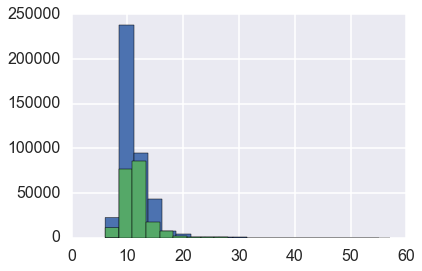

In [6]:
print np.min(train_annId_len.values()), np.max(train_annId_len.values())
print np.min(valid_annId_len.values()), np.max(valid_annId_len.values())
plt.hist(train_annId_len.values(), bins=20)
plt.hist(valid_annId_len.values(), bins=20)
plt.show()

In [7]:
train_buckets = {}
valid_buckets = {}
seqlens = [16, 32, 64]
for sl in seqlens:
    train_buckets[sl] = []
    valid_buckets[sl] = []
def sieve(l):
    for sl in seqlens:
        if l < sl:
            return sl
for il in train_annId_len.items():
    train_buckets[sieve(il[1])].append(il[0])
for il in valid_annId_len.items():
    valid_buckets[sieve(il[1])].append(il[0])

In [8]:
for sl in seqlens:
    print len(train_buckets[sl]), len(valid_buckets[sl])

391066 191564
22680 10931
367 159


In [9]:
pickle.dump({'raw wordset': wordset, 'train buckets':train_buckets, 'valid buckets':valid_buckets}, 
            open('coco_captions_trainval2014.pkl', 'wb'), protocol=-1)